In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

# Adjusting configuration of plots that will be created
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\Users\Vanja\OneDrive\Desktop\movies.csv')

In [2]:
# Let's take a look at the data

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
# Let's see if there is any missing data
    
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

# Percent missing in numerical columns
print("Numerical Columns:") 
print(df[num_vars].isnull().sum().sort_values(ascending=False)/len(df))
print("\n")

#Percent missing in categorial columns
print("Categorical Columns:")
print(df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df))

Numerical Columns:
budget     0.283125
gross      0.024648
runtime    0.000522
score      0.000391
votes      0.000391
year       0.000000
dtype: float64


Categorical Columns:
rating      0.010042
company     0.002217
writer      0.000391
country     0.000391
released    0.000261
star        0.000130
name        0.000000
genre       0.000000
director    0.000000
dtype: float64


In [4]:
df[cat_vars].isnull().sum().sort_values(ascending=False)/len(df)

null_data = df[df.isnull().any(axis=1)]
print(null_data)

                 name rating   genre  year                           released  \
16               Fame      R   Drama  1980       May 16, 1980 (United States)   
19         Stir Crazy      R  Comedy  1980  December 12, 1980 (United States)   
24       Urban Cowboy     PG   Drama  1980       June 6, 1980 (United States)   
25     Altered States      R  Horror  1980  December 25, 1980 (United States)   
26    Little Darlings      R  Comedy  1980     March 21, 1980 (United States)   
...               ...    ...     ...   ...                                ...   
7663     More to Life    NaN   Drama  2020   October 23, 2020 (United States)   
7664      Dream Round    NaN  Comedy  2020   February 7, 2020 (United States)   
7665    Saving Mbango    NaN   Drama  2020          April 27, 2020 (Cameroon)   
7666     It's Just Us    NaN   Drama  2020    October 1, 2020 (United States)   
7667        Tee em el    NaN  Horror  2020    August 19, 2020 (United States)   

      score    votes       

In [5]:
# Rating make new category for missing values - NR (Not Rated)

df['rating'] = df['rating'].replace(np.nan, 'NR')

# Unknown categories
columns_1 = ['company', 'writer', 'country', 'released', 'star']
for col in columns_1:
        df[col].fillna("Unknown", inplace = True)


# Generate Summary Statistics for Numerical Data
print(df.describe())

# Replace missing numerical values using mean imputation method
columns_2 = ['budget', 'gross', 'runtime', 'score', 'votes']
for col in columns_2:
    df[col].fillna(round(np.mean(df[col])), inplace = True)

              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  


In [6]:
# There are certiainly outliers in the budget and gross columns which we could dive into in a future analysis but for the sake 
# of this project we will use the mean impuation method
# A Warning **Since, around 28% of the data in the budget column is missing this method can result in a loss of variation in 
# the data**

In [7]:
# Create correct Year column
df['year currect'] = df['released'].astype(str).str[:4]

In [8]:
# Sort by gross amount
df = df.sort_values(by = ['gross'], inplace=False, ascending=False)

In [9]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year currect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876.0,1.400000e+03,British Broadcasting Corporation (BBC),103.0,Febr
7625,The Untold Story,NR,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876.0,7.900000e+02,Visual Arts Entertainment,104.0,Janu
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876.0,6.820000e+02,Roxwell Films,93.0,June
2417,Madadayo,NR,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000.0,5.960000e+02,DENTSU Music And Entertainment,134.0,Apri


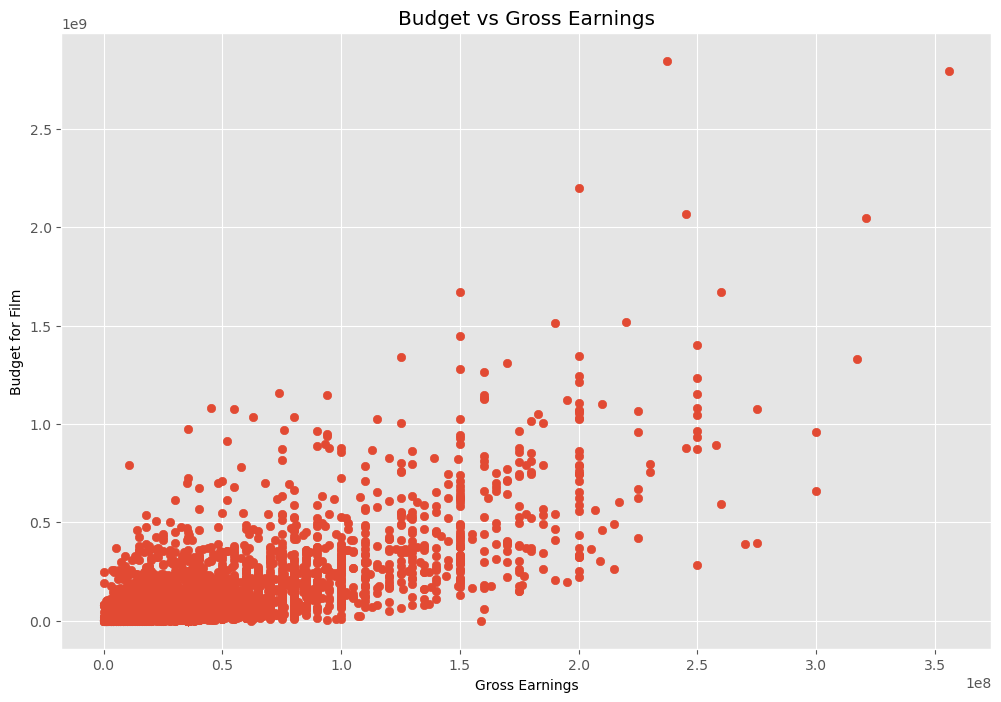

In [10]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()



In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year currect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri


<Axes: xlabel='budget', ylabel='gross'>

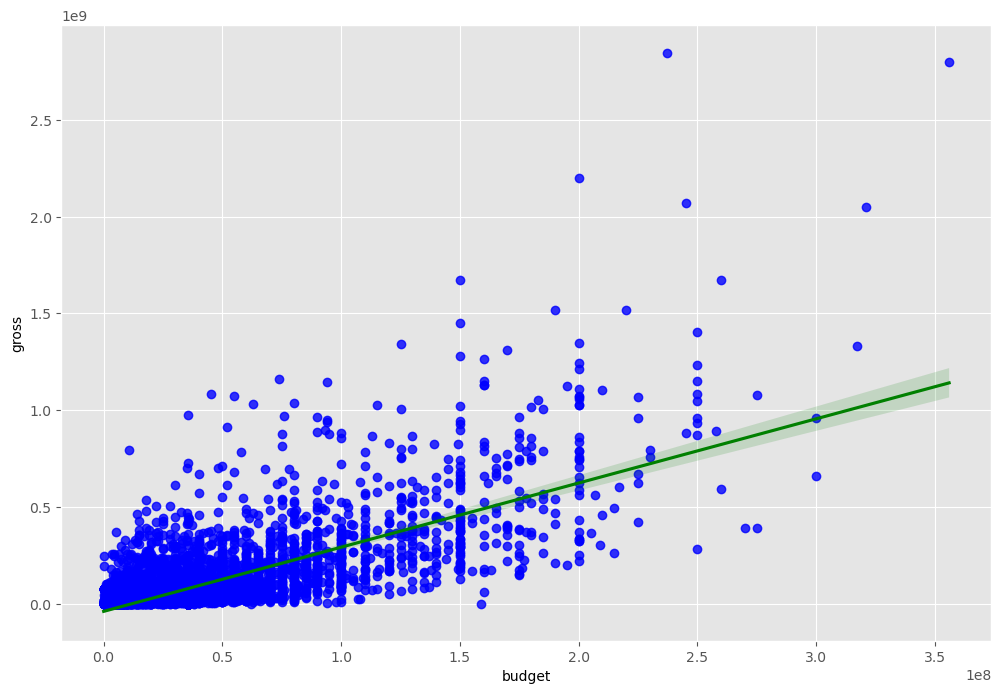

In [12]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "green"})

In [13]:
# Let's start looking at correlation

# Pearson
df.corr(numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097656,0.222810,0.265578,0.252042,0.120758
score,0.097656,1.000000,0.409169,0.064697,0.182862,0.399296
votes,0.222810,0.409169,1.000000,0.421007,0.628713,0.309168
budget,0.265578,0.064697,0.421007,1.000000,0.711270,0.265289
gross,0.252042,0.182862,0.628713,0.711270,1.000000,0.241336
runtime,0.120758,0.399296,0.309168,0.265289,0.241336,1.000000


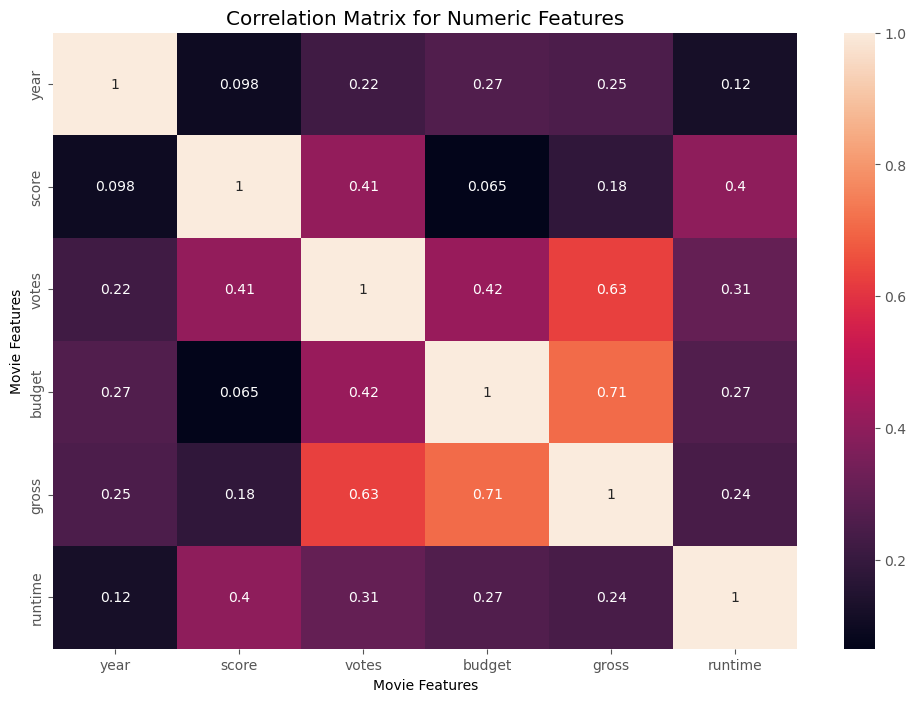

In [14]:
# High correlation between budget and gross
# Lets visualize the above table

correlation_matrix = df.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()



In [15]:
# Lets inspect the companies

df_numericalized = df

for col_name in df_numericalized.columns:
    if(df_numericalized[col_name].dtype == 'object'):
        df_numericalized[col_name] = df_numericalized[col_name].astype('category')
        df_numericalized[col_name] = df_numericalized[col_name].cat.codes
        
df_numericalized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year currect
5445,533,6,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,10
7445,535,6,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8
3045,6896,6,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,10
6663,5144,6,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,10
7244,536,6,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,7,4,2000,1119,6.5,5200.0,730,1123,2319,54,35589876.0,1.400000e+03,477,103.0,11
7625,6720,3,4,2019,1149,5.7,320.0,2546,2565,1915,55,35589876.0,7.900000e+02,2309,104.0,12
7580,4664,4,5,2019,1835,5.2,735.0,1445,2203,2278,55,35589876.0,6.820000e+02,1992,93.0,14
2417,3406,3,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000.0,5.960000e+02,796,134.0,8


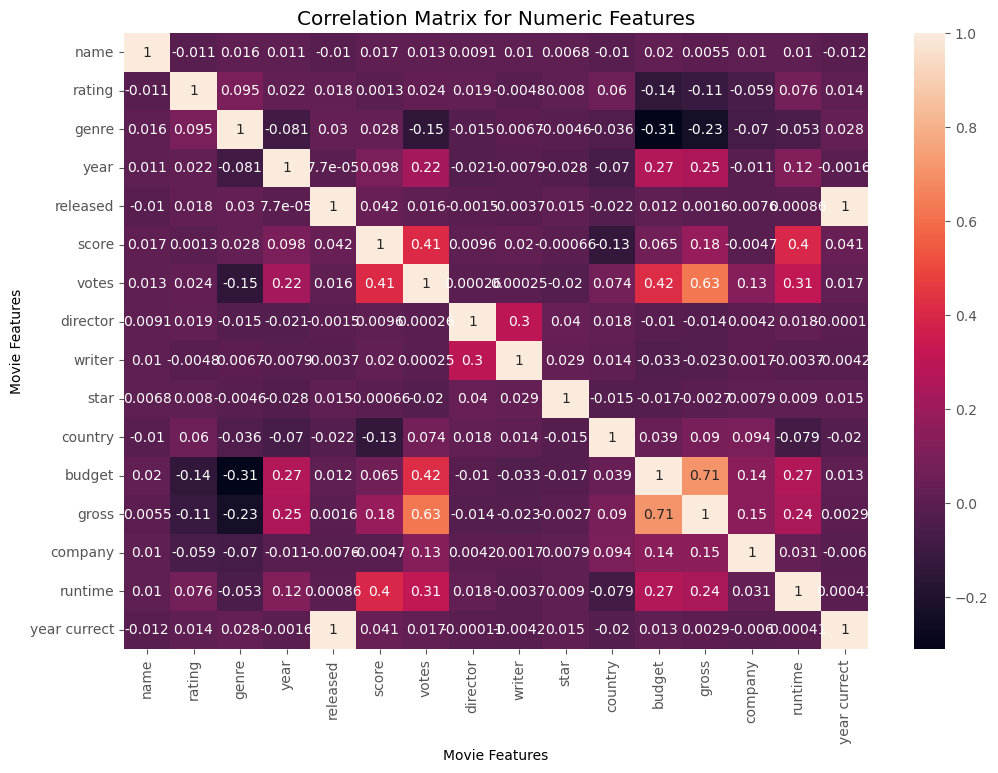

In [17]:
correlation_matrix = df_numericalized.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()